## IMDB Datasets

In [7]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [8]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [9]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [3]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 1s 8ms/step - loss: 0.6147 - acc: 0.6473 - val_loss: 0.4092 - val_acc: 0.8647
Epoch 2/5
118/118 [==============================] - 1s 5ms/step - loss: 0.3976 - acc: 0.8403 - val_loss: 0.3035 - val_acc: 0.8755
Epoch 3/5
118/118 [==============================] - 1s 5ms/step - loss: 0.3026 - acc: 0.8842 - val_loss: 0.2761 - val_acc: 0.8840
Epoch 4/5
118/118 [==============================] - 1s 5ms/step - loss: 0.2369 - acc: 0.9103 - val_loss: 0.2768 - val_acc: 0.8864
Epoch 5/5
118/118 [==============================] - 1s 6ms/step - loss: 0.2014 - acc: 0.9244 - val_loss: 0.2947 - val_acc: 0.8842


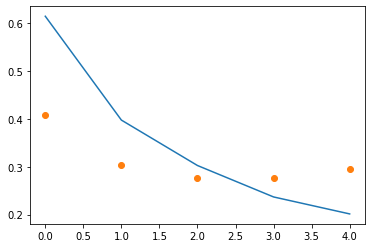

In [4]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [5]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 1s 812us/step - loss: 0.3125 - acc: 0.8770


### IMDB Classification using simple RNN

In [10]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [11]:
X_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32], dtype=int32)

In [98]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) # 각각의 단어를 n=16 차원 공간에 올리기
rnn.add(layers.SimpleRNN(32,return_sequences='True')) 
# 다층 RNN를 하기 위해 return_sequences = True로 설정
